In [49]:
using Plots
using Distributions
using SpecialFunctions


In [56]:
function get_mean_positive(samples)
    sum = 0.
    count = 0

    positive_samples = samples[samples .> 0]
    for i in 1:size(samples,1)
        if samples[i] > 0
            sum += samples[i]
            count += 1
        end
     end
    return sum / count, sum, count, positive_samples
end


function get_mean_negative(samples)
    sum = 0.
    count = 0

    negative_samples = samples[samples .< 0]
    for i in 1:size(samples,1)
        if samples[i] < 0
            sum += samples[i]
            count += 1
        end
     end
    return sum / count, sum, count, negative_samples
end

get_mean_negative (generic function with 1 method)

In [68]:


# Parameters
n  = 10_000
μ = 0.0 #scaling.v_thermal_e_code  # mean
σ = 1.0 #scaling.v_thermal_e_code



1.0

In [101]:
norm_dist = Normal(μ, σ)

left_border = -1.
right_border = 1.

uni_dist = Uniform(left_border, right_border)

# Sample from the distribution
vx = rand(norm_dist, n)
rx = rand(uni_dist, n);

dt = 1e-4

exit_l_rx = []
exit_l_vx = []
mean_l_vx = []
count_l   = []

exit_r_rx = []
exit_r_vx = []
mean_r_vx = []
count_r   = []


count = 0
for t = 1:100_000
    count += 1
    rx += vx .* dt

    for i = 1:n
        if rx[i] > right_border
            push!(exit_r_rx, rx[i])
            push!(exit_r_vx, vx[i])
            rx[i] =  right_border - 1e-6 #rand(uni_dist, 1)[1]
            vx[i] =  - abs(rand(norm_dist, 1)[1])
        end

        if rx[i] < left_border
            push!(exit_l_rx, rx[i])
            push!(exit_l_vx, vx[i])
            rx[i] =  left_border + 1e-6#rand(uni_dist, 1)[1]
            vx[i] =  abs(rand(norm_dist, 1)[1])
        end
    end
    #println(size(left_rx))

    if count >= 100 
        mean_val_r, _,_,_ = get_mean_positive(exit_r_vx)
        mean_val_l, _,_,_ = get_mean_negative(exit_l_vx)

        push!(mean_r_vx, mean_val_r)
        push!(mean_l_vx, mean_val_l)

        push!(count_r, size(exit_r_vx,1))
        push!(count_l, size(exit_l_vx,1))
        count = 0

        exit_r_vx = []
        exit_r_vx = []

        exit_l_vx = []
        exit_l_vx = []
    end 
    #println(mean(left_vx))

    
end

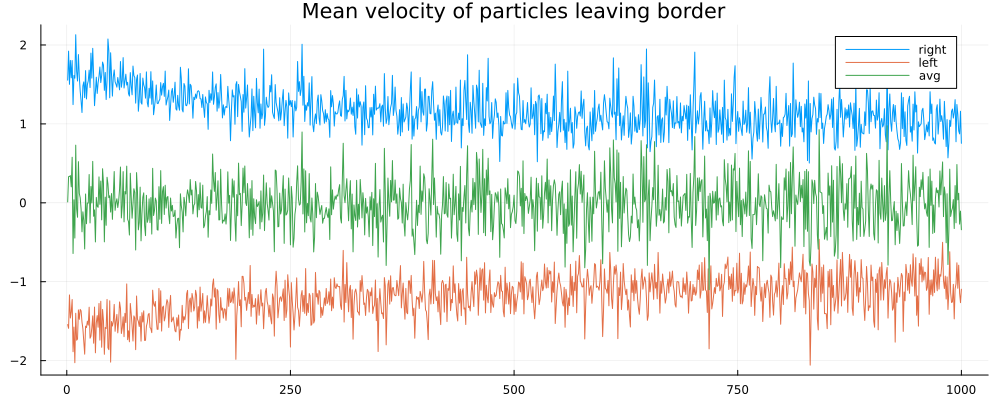

In [102]:
plot(mean_r_vx  / mean_theo, label="right", title="Mean velocity of particles leaving border", size=(1000, 400))
plot!(mean_l_vx / mean_theo, label="left")

plot!((mean_r_vx + mean_l_vx) / mean_theo, label="avg")
#hline!([-mean_theo])
#hline!([mean_theo])

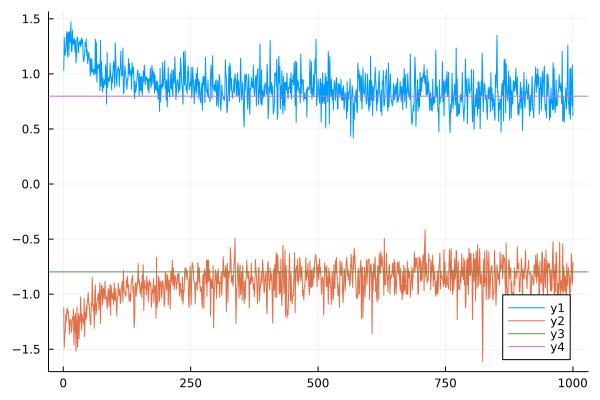

In [82]:
plot(mean_r_vx)
plot!(mean_l_vx)
hline!([-mean_theo])
hline!([mean_theo])

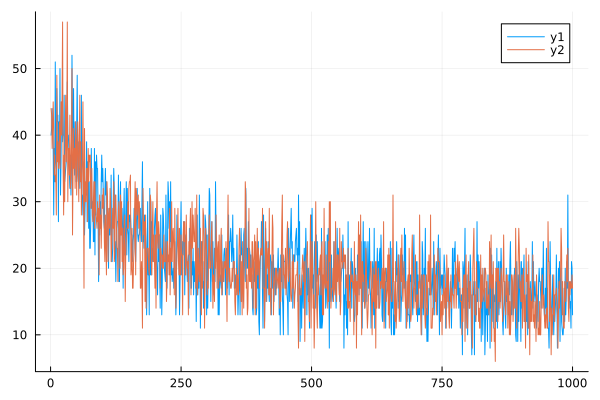

In [81]:
plot(count_r)
plot!(count_l)

In [55]:
mean_theo = σ * sqrt(2 / pi )


0.7978845608028654